How to solve large systems iteratively 

In [243]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from sympy.utilities.lambdify import lambdify
from scipy import sparse
from scipy.linalg import block_diag
from scipy.sparse import csr_matrix


# The Jacobi Method

Solve for each variable in terms of the others, then use the previous values to update each approximation

### Problem 1

In [68]:
def function_jacobi(A, b, tol, maxiters):
    
    D = np.diag(A)
    x = np.ones(len(D))
    e = 1
    maxiters = 50
    iter = 0
    print(x)
    
    
    while (e > tol) & (iter <= maxiters):
        iter += 1
        print("iter is",  iter)
        xp = x + (b-A@x.T)*1/D
        e = la.norm(x - xp, np.inf)
        print("error is ", e)
        x = xp*1.
        
    print("A@x and b are close", np.allclose(A@x, b))

        
    return x


 
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
        
    return A

In [74]:
A = diag_dom(5)
b = np.random.random(5)
function_jacobi(A, b, 1e-4, 200)

[1. 1. 1. 1. 1.]
iter is 1
error is  1.551944210538132
iter is 2
error is  0.9076985246468413
iter is 3
error is  0.14145645377011706
iter is 4
error is  0.09430430251341138
iter is 5
error is  0.0
A@x and b are close True


array([-0.31323644,  0.68172298, -0.09342697,  0.59781877,  0.09850603])

### Convergence

### Problem 2

In [83]:
def function_jacobi(A, b, tol, maxiters, plot=False):
    
    D = np.diag(A)
    x = np.ones(len(D))
    e = 1
    maxiters = 50
    iter = 0
    print(x)
    err = np.empty(1)
    iter_all = np.empty(1)
    
    while (e > tol) & (iter <= maxiters):
        iter += 1
        print("iter is",  iter)
        xp = x + (b-A@x.T)*1/D
        e = la.norm(x - xp, np.inf)
        print(e)
        err = np.append(err, e)
        iter_all = np.append(iter_all, iter)
        print("error is ", e)
        x = xp*1.
        
    print("A@x and b are close", np.allclose(A@x, b))
    
    if (plot==True):
        plt.semilogy(iter_all, err)

        
    return x

[1. 1. 1. 1. 1.]
iter is 1
1.551944210538132
error is  1.551944210538132
iter is 2
0.9076985246468413
error is  0.9076985246468413
iter is 3
0.14145645377011706
error is  0.14145645377011706
iter is 4
0.09430430251341138
error is  0.09430430251341138
iter is 5
0.0
error is  0.0
A@x and b are close True


array([-0.31323644,  0.68172298, -0.09342697,  0.59781877,  0.09850603])

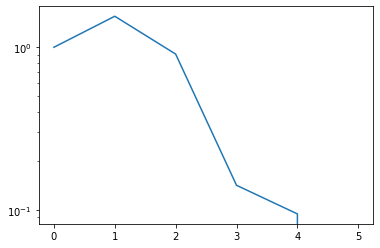

In [84]:
function_jacobi(A, b, 1e-6, 200, plot=True)

# The Gauss-Seidel Method

### Exercise 3

In [123]:
def function_gauss_seidel(A, b, tol, maxiters, plot=False):
    
    D = np.diag(A)
    x1 = np.ones(len(D))
    e = 1
    maxiters = 50
    iter = 0
    print(x1)
    err = np.empty(1)
    iter_all = np.empty(1)
    
    while (e > tol) & (iter <= maxiters):
        iter += 1
        print("iter is",  iter)
        
        x0 = np.copy(x1)
        
        # For each row
        for i in range(np.shape(A)[0]):
            x1[i] = x0[i] + (1/D[i]) * (b[i] - x1@A[i,:].T)
        
        e = la.norm(x0 - x1, np.inf)
        print(e)
        err = np.append(err, e)
        iter_all = np.append(iter_all, iter)
        print("error is ", e)
        
        
    print("A@x and b are close", np.allclose(A@x1, b))
    
    if (plot==True):
        plt.semilogy(iter_all, err)

        
    return x

[1. 1. 1. 1. 1.]
iter is 1
1.4051284376879751
error is  1.4051284376879751
iter is 2
0.9367522917919834
error is  0.9367522917919834
iter is 3
0.4683761458959915
error is  0.4683761458959915
iter is 4
0.23418807294799565
error is  0.23418807294799565
iter is 5
0.11709403647399783
error is  0.11709403647399783
iter is 6
0.0585470182369989
error is  0.0585470182369989
iter is 7
0.029273509118499436
error is  0.029273509118499436
iter is 8
0.014636754559249718
error is  0.014636754559249718
iter is 9
0.007318377279624866
error is  0.007318377279624866
iter is 10
0.003659188639812447
error is  0.003659188639812447
iter is 11
0.0018295943199062303
error is  0.0018295943199062303
iter is 12
0.000914797159953129
error is  0.000914797159953129
iter is 13
0.0004573985799765645
error is  0.0004573985799765645
iter is 14
0.00022869928998829614
error is  0.00022869928998829614
iter is 15
0.00011434964499415501
error is  0.00011434964499415501
iter is 16
5.717482249709138e-05
error is  5.7174822497

array([0., 0., 0.])

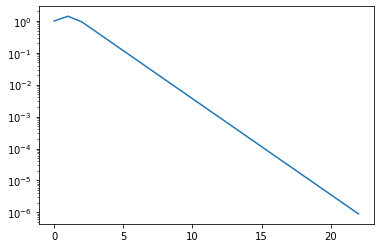

In [124]:
A = diag_dom(5)
b = np.random.random(5)


function_gauss_seidel(A, b, 1e-6, 200, plot=True)

### Solving Sparse Systems Iteratively

### Problem 4

In [149]:
def function_gauss_seidel_sparse(A, b, tol, maxiters):
 
    
    D = A.diagonal()
    x1 = np.ones(len(D))
    e = 1
    maxiters = 50
    iter = 0
    #print(x1)
    err = np.empty(1)
    iter_all = np.empty(1)
    
    while (e > tol) & (iter <= maxiters):
        iter += 1
        print("iter is",  iter)
        
        x0 = np.copy(x1)
        
        # For each row
        for i in range(np.shape(A)[0]):
               
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            x1[i] = x0[i] + (1/D[i]) * (b[i] - A.data[rowstart:rowend] @ x1[A.indices[rowstart:rowend]].T)
        
        e = la.norm(x0 - x1, np.inf)
        print(e)
        err = np.append(err, e)
        iter_all = np.append(iter_all, iter)
        print("error is ", e)
        
        
    print("A@x and b are close", np.allclose(A@x1, b))
    print("A@x ", A@x1)
    print("b", b)

    return x

In [150]:
A = sparse.csr_matrix(diag_dom(100))
b = np.random.random(100)
function_gauss_seidel_sparse(A, b, 1e-6, 200)

iter is 1
1.625871745421557
error is  1.625871745421557
iter is 2
0.7689802125410604
error is  0.7689802125410604
iter is 3
0.20940245191889317
error is  0.20940245191889317
iter is 4
0.09106348866004024
error is  0.09106348866004024
iter is 5
0.0148940834093946
error is  0.0148940834093946
iter is 6
0.0018411008250282523
error is  0.0018411008250282523
iter is 7
0.0007316216825147305
error is  0.0007316216825147305
iter is 8
0.00011618208008989939
error is  0.00011618208008989939
iter is 9
2.8073855345589482e-05
error is  2.8073855345589482e-05
iter is 10
4.008409322006634e-06
error is  4.008409322006634e-06
iter is 11
8.567547134016168e-07
error is  8.567547134016168e-07
A@x and b are close False
A@x  [0.0234228  0.91622726 0.17066241 0.91087427 0.4872379  0.07791757
 0.20623608 0.47378889 0.89384716 0.94794517 0.67480419 0.19654762
 0.25570869 0.10329806 0.73320619 0.30855084 0.06719046 0.70438443
 0.84101528 0.67367044 0.71955532 0.30153505 0.74549013 0.10209534
 0.12084452 0.54002

array([0., 0., 0.])

# The Successive Over-Relaxation Method

In [152]:
def function_SOR_sparse(A, b, w, tol, maxiters):
 
    
    D = A.diagonal()
    x1 = np.ones(len(D))
    e = 1
    maxiters = 50
    iter = 0
    #print(x1)
    err = np.empty(1)
    iter_all = np.empty(1)
    
    while (e > tol) & (iter <= maxiters):
        iter += 1
        print("iter is",  iter)
        
        x0 = np.copy(x1)
        
        # For each row
        for i in range(np.shape(A)[0]):
               
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            x1[i] = x0[i] + (w/D[i]) * (b[i] - A.data[rowstart:rowend] @ x1[A.indices[rowstart:rowend]].T)
        
        e = la.norm(x0 - x1, np.inf)
        print(e)
        err = np.append(err, e)
        iter_all = np.append(iter_all, iter)
        print("error is ", e)
        
        
    print("A@x and b are close", np.allclose(A@x1, b))
    print("A@x ", A@x1)
    print("b", b)

    return x

In [153]:
A = sparse.csr_matrix(diag_dom(100))
b = np.random.random(100)
function_gauss_seidel_sparse(A, b, 1e-6, 200)

iter is 1
1.4592746841719924
error is  1.4592746841719924
iter is 2
0.6853569361933813
error is  0.6853569361933813
iter is 3
0.23428764145012718
error is  0.23428764145012718
iter is 4
0.06151926393926149
error is  0.06151926393926149
iter is 5
0.009898027139954774
error is  0.009898027139954774
iter is 6
0.003822513372713471
error is  0.003822513372713471
iter is 7
0.00048551535422658443
error is  0.00048551535422658443
iter is 8
0.0001203991284906003
error is  0.0001203991284906003
iter is 9
2.134757484859029e-05
error is  2.134757484859029e-05
iter is 10
3.439168037040058e-06
error is  3.439168037040058e-06
iter is 11
7.618167725681468e-07
error is  7.618167725681468e-07
A@x and b are close False
A@x  [0.15431459 0.6931286  0.83932065 0.37091333 0.86996656 0.9895679
 0.08392553 0.82006017 0.16736945 0.5707184  0.89595697 0.3391068
 0.26667743 0.44162106 0.88747456 0.37864214 0.60412348 0.74262017
 0.11959906 0.87987821 0.33305158 0.38793916 0.20035818 0.87348188
 0.87648364 0.74659

array([0., 0., 0.])

# A Finite Difference Method (TO FINISH)

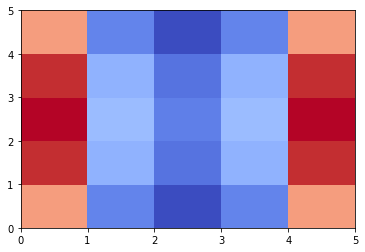

In [305]:
def Finite_diff_method(A, b, w, tol, maxiters, plot=False):
 
    
    D = A.diagonal()
    x1 = np.ones(len(D))
    e = 1
    maxiters = 50
    iter = 0
    #print(x1)
    err = np.empty(1)
    iter_all = np.empty(1)
    
    while (e > tol) & (iter <= maxiters):
        iter += 1
        #print("iter is",  iter)
        
        x0 = np.copy(x1)
        
        # For each row
        for i in range(np.shape(A)[0]):
               
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            x1[i] = x0[i] + (w/D[i]) * (b[i] - A.data[rowstart:rowend] @ x1[A.indices[rowstart:rowend]].T)
        
        e = la.norm(x0 - x1, np.inf)
        #print(e)
        err = np.append(err, e)
        iter_all = np.append(iter_all, iter)
        #print("error is ", e)
        
        
    #print("A@x and b are close", np.allclose(A@x1, b))
    #print("A@x ", A@x1)
    #print("b", b)
    #print("x1 is ", x1)

    
    if (plot==True):
        u = x1.reshape(n,n)
        plt.pcolormesh(u, cmap=plt.get_cmap("coolwarm"))
    
    
    return x, iter


n = 5
#Construct b
b = np.zeros(n)
b[0] = -100
b[len(b)-1] = -100
b = np.tile(b, n)
#Construct B
offsets = [-1,0,1]
B = sparse.diags([1,-n,1], offsets, shape=(n,n))
#Construct the Is
offsets = [-n,n]
I = sparse.diags([1,1], offsets, shape=(n**2,n**2))
#Construct A
A = sparse.block_diag([B]*n) + I
ω = 1.5
result = Finite_diff_method(A, b, ω, 1e-6, 200, plot=True)






### Problem 7

In [306]:
n = 20
#Construct b
b = np.zeros(n)
b[0] = -100
b[len(b)-1] = -100
b = np.tile(b, n)
#Construct B
offsets = [-1,0,1]
B = sparse.diags([1,-n,1], offsets, shape=(n,n))
#Construct the Is
offsets = [-n,n]
I = sparse.diags([1,1], offsets, shape=(n**2,n**2))
#Construct A
A = sparse.block_diag([B]*n) + I

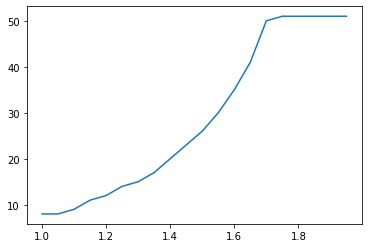

In [309]:
ω = 1

result = np.empty(1)
iter = np.empty(1)

w_vec = np.linspace(1, 1.95, 20)
for i in range(20):
    w = w_vec[i]
    ri, iteri = Finite_diff_method(A, b, w, 1e-6, 200, plot=False)
    result = np.append(result, ri)
    iter = np.append(iter, iteri)

plt.plot(w_vec, iter[1:])
